# Business Problem

Healthcare companies collect a lot of historical data pertaining to these chronic diseases. These datasets can be leveraged to train machine learning algorithms and learn from the history which eventually will help in predicting such chronic conditions in patients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

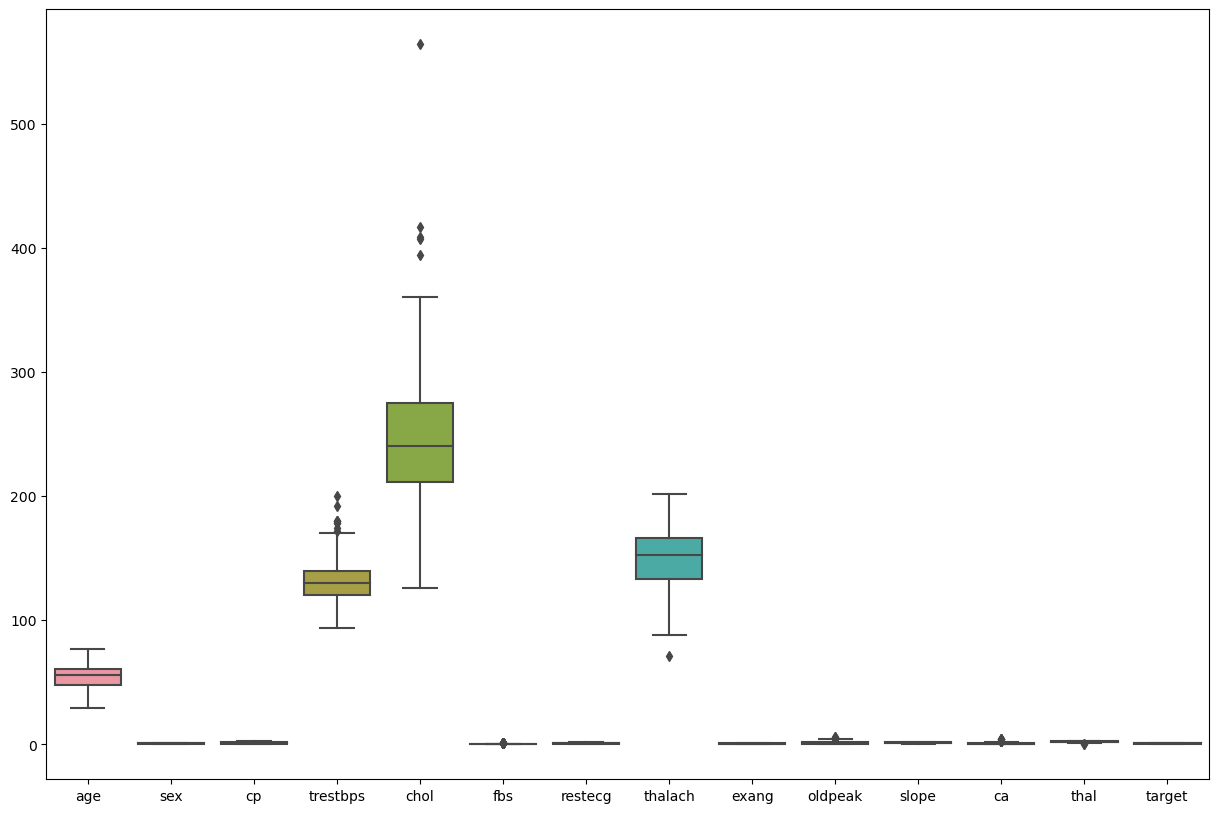

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<Axes: >

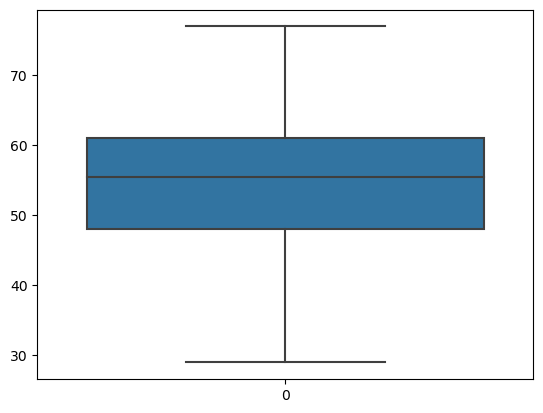

In [11]:
sns.boxplot(df['age'])

In [12]:
#Creating the list of all numerical columns
columns=['age', 'trestbps','chol','thalach','oldpeak']

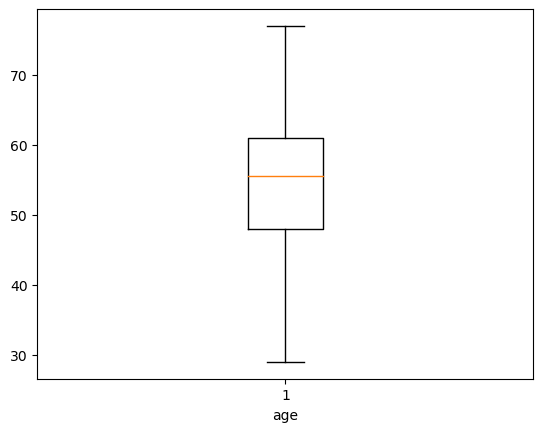

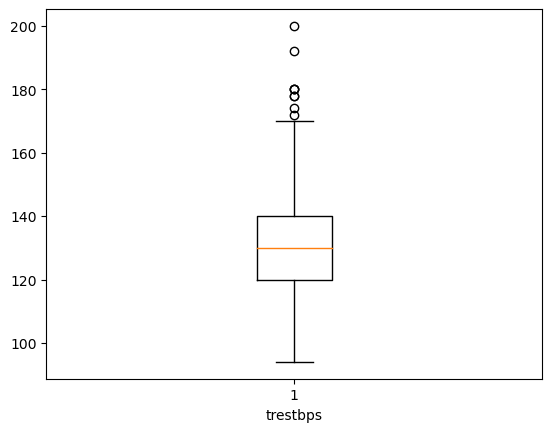

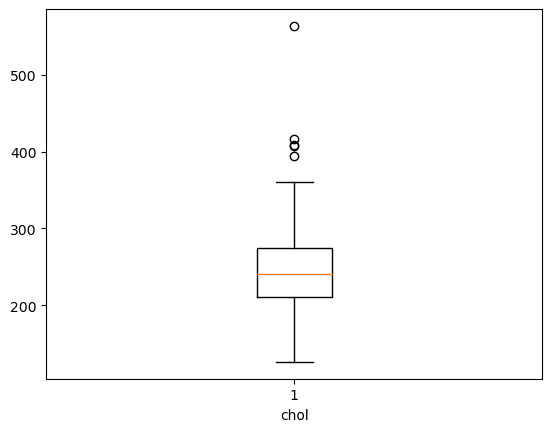

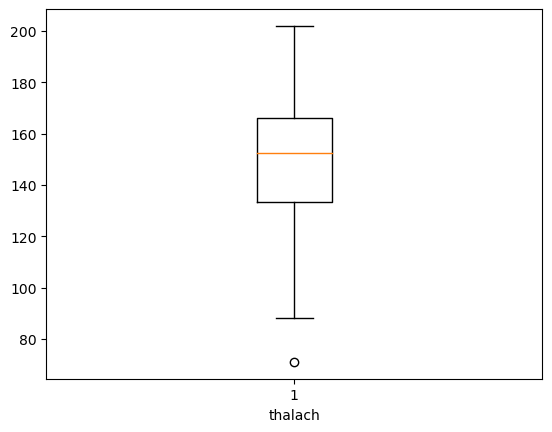

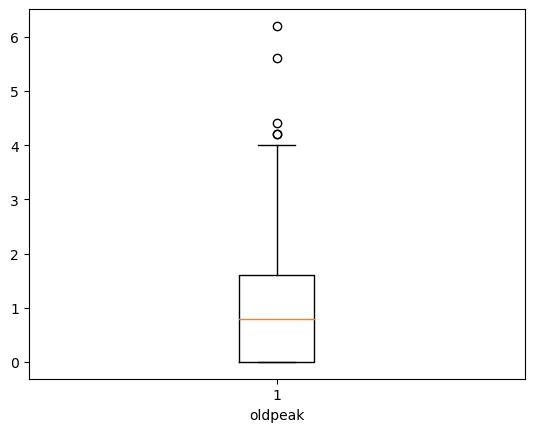

In [13]:
for i in columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [14]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------------------------')
    print('-----------------------------------')

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-----------------------------------
-----------------------------------
sex
[1 0]
-----------------------------------
-----------------------------------
cp
[3 2 1 0]
-----------------------------------
-----------------------------------
trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
-----------------------------------
-----------------------------------
chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 

In [15]:
out_cols=['trestbps','chol','thalach','oldpeak']

In [16]:
df[out_cols]

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6
...,...,...,...,...
298,140,241,123,0.2
299,110,264,132,1.2
300,144,193,141,3.4
301,130,131,115,1.2


In [17]:
for i in out_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LW=Q1-1.5*IQR
    UW=Q3+1.5*IQR
    df=df[(df[i]>=LW) & (df[i]<=UW)]

In [18]:
df.shape

(283, 14)

In [19]:
#Do Visualization

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

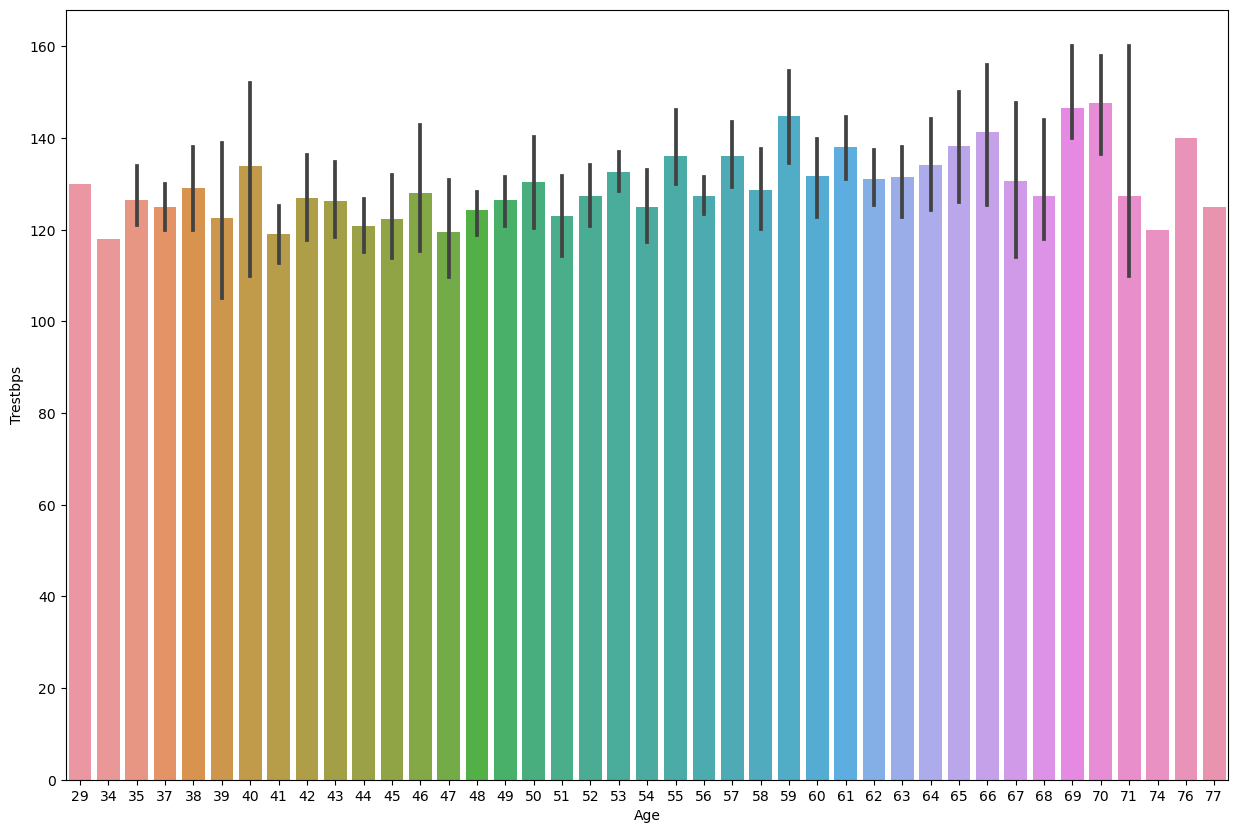

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'age',y = 'trestbps',data = df)
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.show()

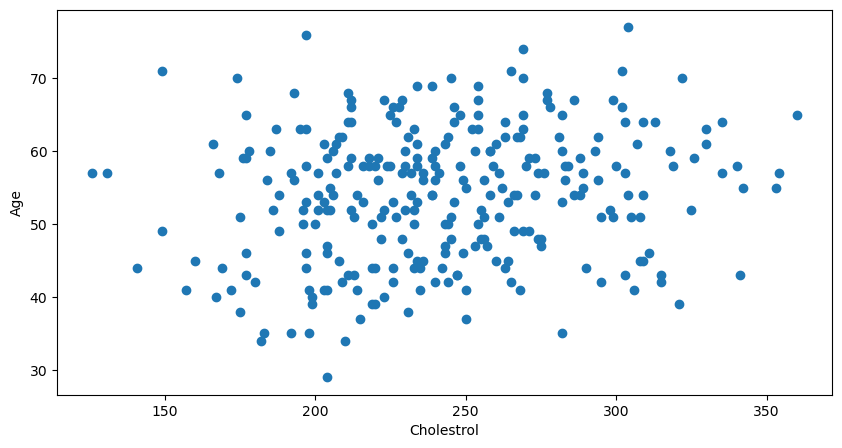

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(x = 'chol',y = 'age', data=df)
plt.xlabel('Cholestrol')
plt.ylabel('Age')
plt.show()

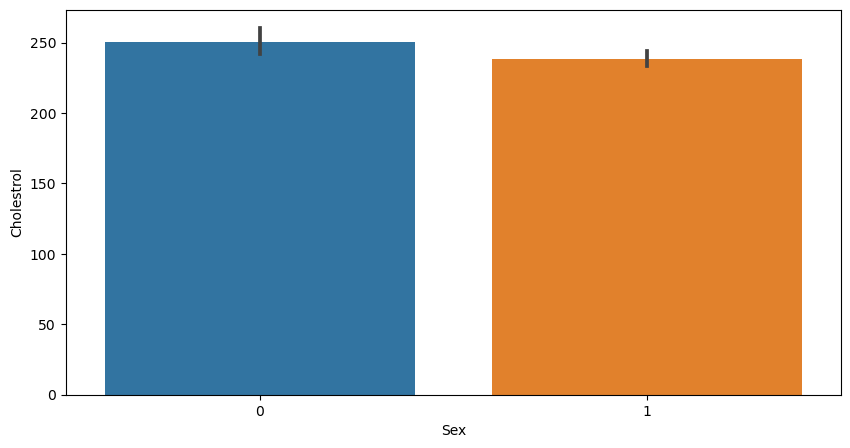

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'sex',y = 'chol',data = df)
plt.xlabel('Sex')
plt.ylabel('Cholestrol')
plt.show()

In [20]:
# VIF or multicolinearity doesnt affect here and correlation doesnt matter too

# Model Implementation

In [21]:
#Splitting data into independent and dependent data 
x=df.iloc[:,:-1]

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y=df['target']

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=68)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [28]:
y_train

118    1
82     1
155    1
189    0
81     1
      ..
25     1
162    1
256    0
252    0
211    0
Name: target, Length: 198, dtype: int64

In [29]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3


In [30]:
y_test

180    0
150    1
166    0
284    0
170    0
      ..
302    0
113    1
152    1
206    0
12     1
Name: target, Length: 85, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt_model=DecisionTreeClassifier(random_state=67, max_depth=5) #Randomly taking any max depth

In [33]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=67)

In [34]:
#Testing Model
#Y_test is for checking if the predictions of x_test are correct or not
dt_pred=dt_model.predict(x_test)

In [35]:
dt_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [36]:
y_test

180    0
150    1
166    0
284    0
170    0
      ..
302    0
113    1
152    1
206    0
12     1
Name: target, Length: 85, dtype: int64

In [37]:
from sklearn.metrics import *

In [38]:
accuracy_score(dt_pred,y_test)

0.6941176470588235

# Hyperparameter Tuning with loop

In [39]:
param_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [40]:
Hyper_df=pd.DataFrame(columns=['Max_depth','accuracy'])

In [41]:
Hyper_df

,Max_depth,accuracy


In [42]:
for X in param_values:
    model = DecisionTreeClassifier(max_depth=X,random_state=67)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred) * 100
    print('max_depth = ', X, 'accuracy=', acc_score)
    

max_depth =  1 accuracy= 69.41176470588235
max_depth =  2 accuracy= 71.76470588235294
max_depth =  3 accuracy= 77.64705882352942
max_depth =  4 accuracy= 74.11764705882354
max_depth =  5 accuracy= 69.41176470588235
max_depth =  6 accuracy= 71.76470588235294
max_depth =  7 accuracy= 72.94117647058823
max_depth =  8 accuracy= 72.94117647058823
max_depth =  9 accuracy= 72.94117647058823
max_depth =  10 accuracy= 72.94117647058823
max_depth =  11 accuracy= 72.94117647058823
max_depth =  12 accuracy= 72.94117647058823
max_depth =  13 accuracy= 72.94117647058823
max_depth =  14 accuracy= 72.94117647058823
max_depth =  15 accuracy= 72.94117647058823


In [43]:
param_grid = {
    'max_depth' : [None,4,5,10,15,20,25],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini', 'entropy']
}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
clf=DecisionTreeClassifier()

In [46]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [47]:
print('Best Parameters: ', grid_search.best_params_)
print('Best Score : ', grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score :  0.7777777777777778


In [48]:
#Performing the model with optimized parameters
dt_model=DecisionTreeClassifier(criterion='gini',random_state=67, max_depth=5, min_samples_leaf = 4, min_samples_split = 2) #Randomly taking any max depth

In [49]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=67)

In [50]:
dt_pred = dt_model.predict(x_test)

In [51]:
accuracy_score(dt_pred,y_test)

0.7294117647058823

In [52]:
confusion_matrix(y_test, dt_pred)

array([[35, 10],
       [13, 27]], dtype=int64)